In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [29]:
cancer=load_breast_cancer()
x=cancer.data
y=cancer.target
x_train_all,x_test,y_train_all,y_test=train_test_split(x,y,stratify=y,random_state=42,test_size=0.2)

In [30]:
x_train,x_val,y_train,y_val=train_test_split(x_train_all,y_train_all,stratify=y_train_all,random_state=42,test_size=0.2)

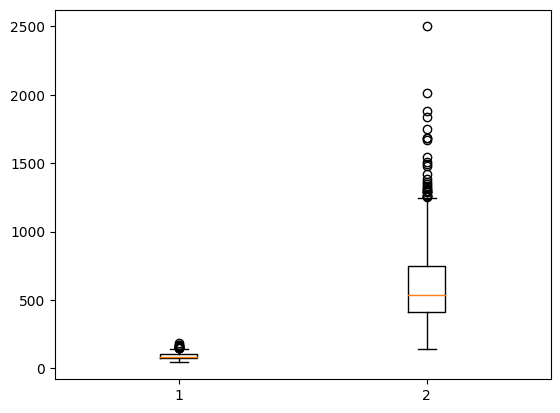

In [ ]:
cancer.feature_names[[2,3]]
plt.boxplot(x_train[:,2:4])
plt.show()

### 스케일을 조정하지 않고 학습을 해보자

In [16]:
class SingleLayer:

  def __init__(self,learning_rate=0.1):
    self.w=None
    self.b=None
    self.losses=[]
    self.w_history=[]
    self.lr=learning_rate

  def forpass(self,x):
    z=np.sum(x*self.w)+self.b
    return z

  def backprop(self,x,err):
    w_grad=x*err
    b_grad=1.0*err
    return w_grad, b_grad

  def add_bias(self,x):
    return np.c_[np.ones(x.shape[0],1),x]

  def activation(self,z):
    a=1/(1+np.exp(-z))
    return a

  def fit(self,x,y,epochs=100):
    self.w=np.ones(x.shape[1])
    self.b=0
    self.w_history.append(self.w.copy()) #가중치 기록
    np.random.seed(42)
    for i in range(epochs):
      loss=0
      indexes=np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z=self.forpass(x[i])
        a=self.activation(z)
        err=y[i]-a
        w_grad, b_grad=self.backprop(x[i],err)
        self.w+=self.lr*w_grad
        self.b+=b_grad
        self.w_history.append(self.w.copy())
        a=np.clip(a,1e-10,1-1e-10)
        loss+=-(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y))

  def predict(self,x):
    z=[self.forpass(x_i) for x_i in x]
    return np.array(z)>0

  def score(self,x,y):
    return np.mean(self.predict(x)==y)


In [17]:
layer1=SingleLayer()
layer1.fit(x_train,y_train)

<ipython-input-16-1ac6dc4075bd>:23: RuntimeWarning: overflow encountered in exp
  a=1/(1+np.exp(-z))


In [18]:
layer1.score(x_val,y_val)

0.9120879120879121

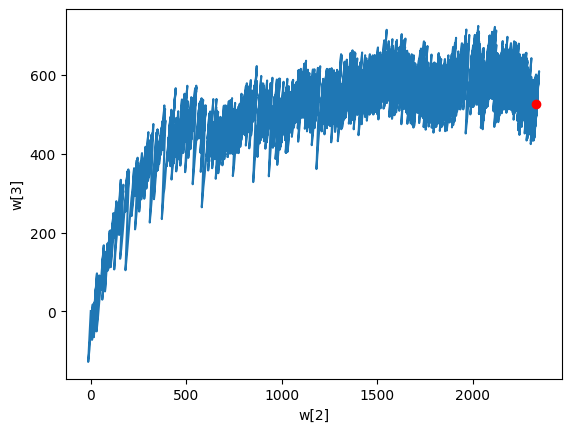

In [19]:
w2=[]
w3=[]
for w in layer1.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2,w3)
plt.plot(w2[-1],w3[-1],'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

## 스케일을 조정하여 모델을 훈련하자!

In [31]:
train_mean=np.mean(x_train,axis=0)
train_std=np.std(x_train,axis=0)
x_train_scaled=(x_train-train_mean)/train_std

In [32]:
layer2=SingleLayer()
layer2.fit(x_train_scaled,y_train)

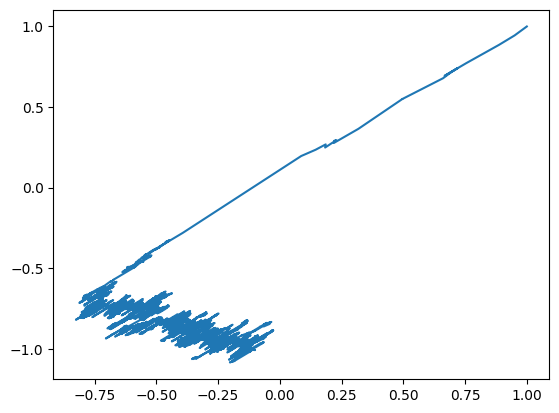

In [33]:
w2=[]
w3=[]
for w in layer2.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2,w3)
plt.show()

In [34]:
layer2.score(x_val,y_val)

0.37362637362637363

In [35]:
val_mean=np.mean(x_val,axis=0)
val_std=np.std(x_val,axis=0)
x_val_scaled=(x_val-val_mean)/val_std

In [36]:
layer2.score(x_val_scaled,y_val)

0.967032967032967

## 스케일을 조정하니 최적화를 더욱 잘하며 성능도 향상됨

## 스케일을 조정한 다음 실수하기 쉬운 함정은?

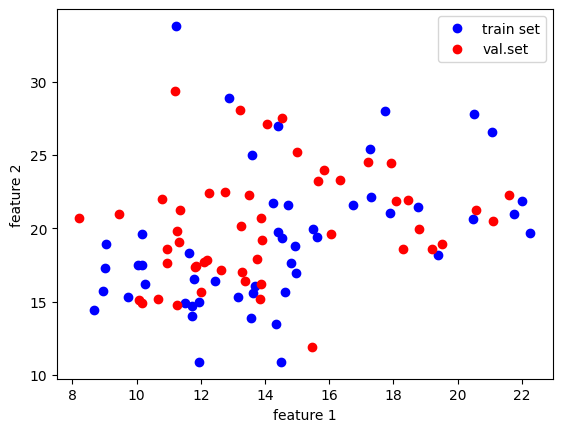

In [37]:
plt.plot(x_train[:50,0],x_train[:50,1],'bo')
plt.plot(x_val[:50,0],x_val[:50,1],'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set','val.set'])
plt.show()

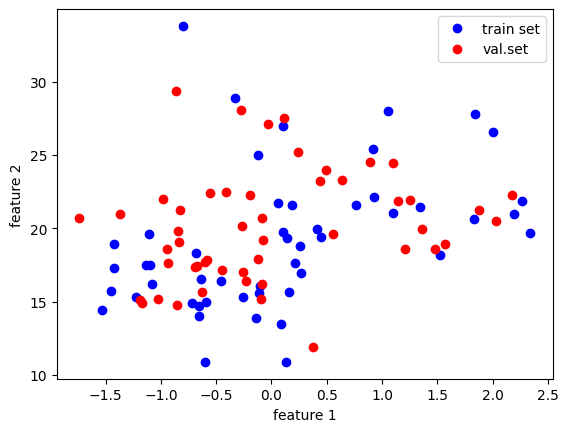

In [38]:
plt.plot(x_train_scaled[:50,0],x_train[:50,1],'bo')
plt.plot(x_val_scaled[:50,0],x_val[:50,1],'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set','val.set'])
plt.show()

미세하게 훈련세트와 검증세트가 다른 비율로 변환되었다.
## 올바르게 전처리하는 방법!
### 훈련세트의 평균과 표준편차로 검증세트 전처리하기

In [39]:
x_val_scaled=(x_val-train_mean)/train_std

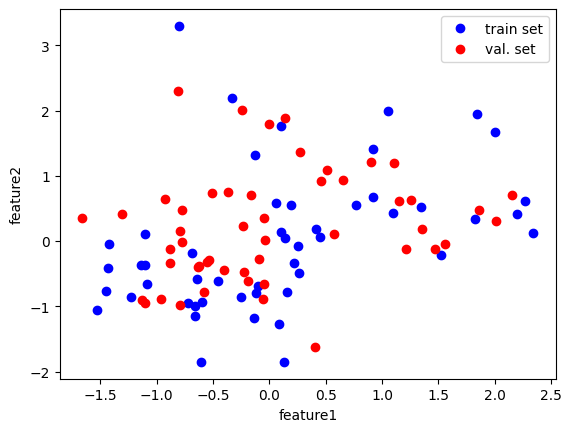

In [40]:
plt.plot(x_train_scaled[:50,0],x_train_scaled[:50,1],'bo')
plt.plot(x_val_scaled[:50,0],x_val_scaled[:50,1],'ro')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend(['train set','val. set'])
plt.show()

In [41]:
layer2.score(x_val_scaled,y_val)

0.967032967032967